# Последовательности

In [1]:
import math
import numpy as np

In [2]:
import matplotlib.pyplot as plt

### создадим декоратор функций, чтобы избежать ожибки деления на ноль

In [3]:
def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f
    

In [4]:
@safe
def func1(x):
    return 2 ** x - x

@safe
def func2(x):
    return 1 / (1 - x)

@safe
def func3(x):
    return (-1) ** x + (2 * x) ** 0.5

@safe
def func4(x):
    return (-1) ** (2 * x) + 1 / (x ** 2)


In [5]:
xs = np.linspace(1, 10, 50)

In [6]:
funcs = [func1, func2]

ys = []
for func in funcs:
    ys.append([func(i) for i in xs])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


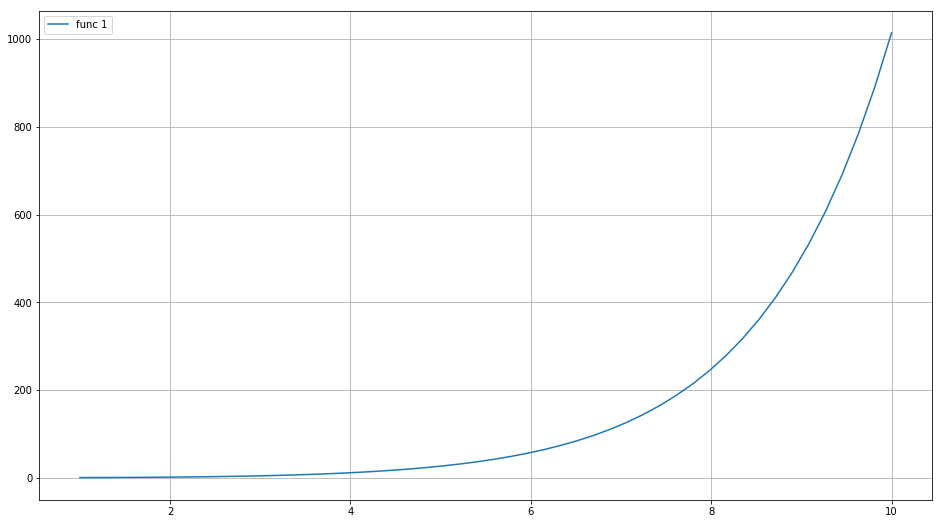

In [8]:
plt.figure(figsize=(16,9))
plt.plot(xs, ys[0], label = 'func 1')
plt.yscale('linear')
plt.legend()
plt.grid()
plt.show()

#### функция возрастающая, предел при бесконечности = бесконечность

In [33]:
func1(5)

27

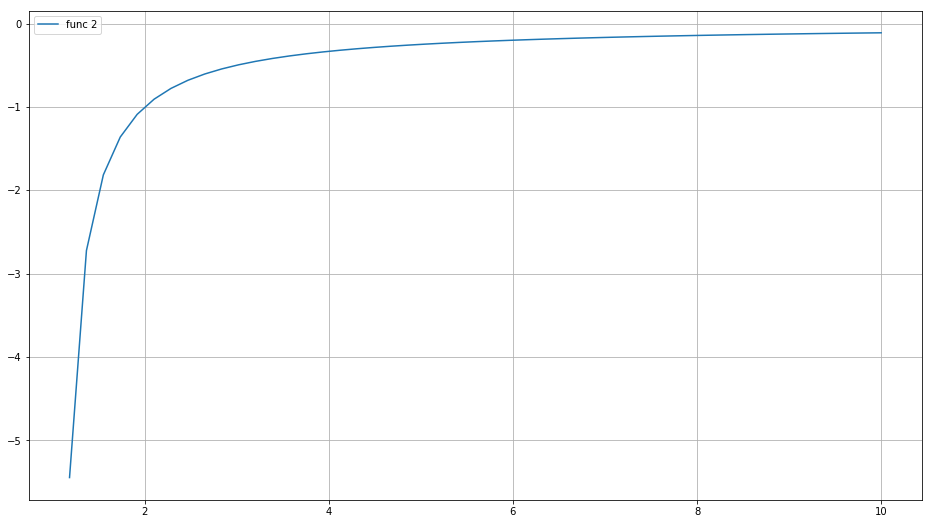

In [9]:
plt.figure(figsize=(16,9))
plt.plot(xs, ys[1], label = 'func 2')
plt.yscale('linear')
plt.legend()
plt.grid()
plt.show()

#### функция возрастающая, предел при бесконечности = -0

#### пятый член последовательности будет при n=6 

In [35]:
func2(6)

-0.2

In [16]:
xs = list(map(int, np.linspace(1, 100, 100)))

In [17]:
ys3 = list(map(func3, xs))

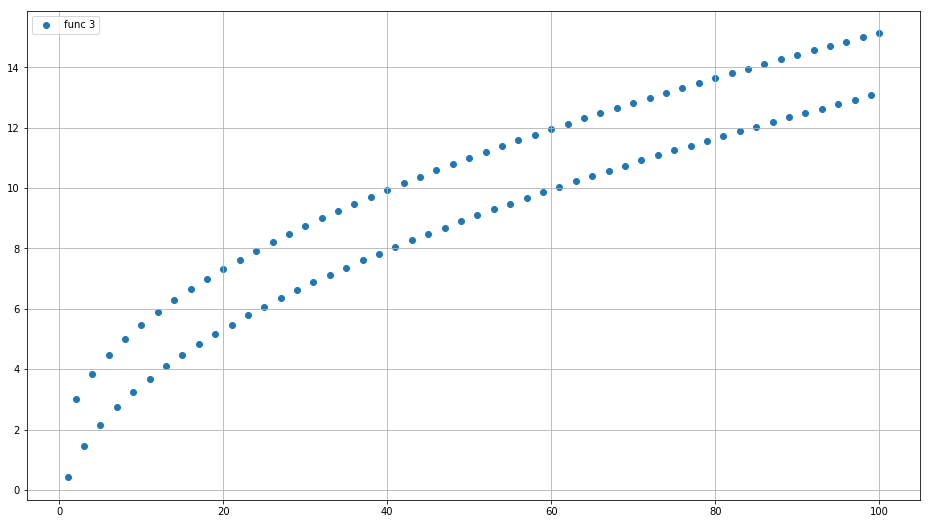

In [18]:
plt.figure(figsize=(16,9))
plt.scatter(xs, ys3, label = 'func 3')
plt.yscale('linear')
plt.legend()
plt.grid()
plt.show()

#### функция возрастающая, предел при бесконечности = бесконечность

In [36]:
func3(5)

2.1622776601683795

In [30]:
xs = list(map(int, np.linspace(1, 20, 20)))
ys4 = list(map(func4, xs))

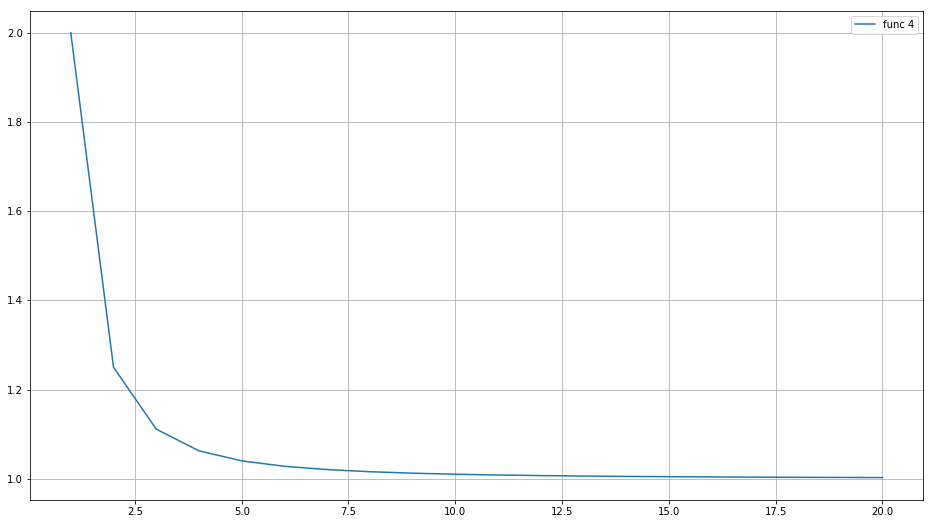

In [31]:
plt.figure(figsize=(16,9))
plt.plot(xs, ys4, label = 'func 4')
plt.yscale('linear')
plt.legend()
plt.grid()
plt.show()

#### функция убывающая, предел при бесконечности = +1

In [37]:
func4(5)

1.04

#### Найти 12-й член заданной неявно последовательности a(1)=128, a(n+1) - a(n) = 6

In [38]:
a1 = 128
d_a = 6

a12 = a1 + d_a * (12 - 1)
a12

194

In [40]:
x = 128
for _, i in enumerate(range(12)):
    print(f'a{_ + 1} = {x}')
    x += d_a

a1 = 128
a2 = 134
a3 = 140
a4 = 146
a5 = 152
a6 = 158
a7 = 164
a8 = 170
a9 = 176
a10 = 182
a11 = 188
a12 = 194


#### *На языке Python предложить алгоритм вычисляющий численно предел с точностью

#### e = 10^-7

#### lim = n/n!^(1/n)

#### точность будем считать как разность двух членов последовательности a(n+1) - a(n) <= 10^-7
#### исходя из критерия Коши

In [41]:
def lim(func, epsilon = 1e-7, x_start = 1):
    delta = func(x_start + 1) - func(x_start)
    while epsilon < delta:
        x_start += 1
        delta = func(x_start + 1) - func(x_start)
    return func(x_start), x_start   
    

In [42]:
def func(x):
    return x / (np.math.factorial(x) ** (1/x))

In [43]:
lim(func, epsilon = 1e-3)

(2.617701998673183, 83)

#### Проблема этой функции в том, что большие значения факториала не помещаются в тип данных float

In [44]:
def func2(x):
    d = 1
    for i in range(1, x + 1):
        d *= i ** (1/x)
    return x / d

In [45]:
%%time

lim(func2, 1e-7)

Wall time: 32 s


(2.716988323727482, 11778)

#### Ответ получен, но очень долго

In [46]:
%%time

func2(1000000)

Wall time: 287 ms


2.7182605533824336

In [47]:
def lim_opt(func, epsilon, x_start = 1, x_rate_pow = 3):
    
    def delta(x):
        return func(x + 1) - func(x)
    
    x = x_start
    x_rates = list(map(int, np.logspace(x_rate_pow, 0, x_rate_pow + 1)))
        
    for i in x_rates:
        while delta(x + i) > epsilon:
            x += i
    x += 1
    
    return func(x), x

In [48]:
%%time

lim_opt(func2, 1e-7, x_rate_pow = 3)

Wall time: 204 ms


(2.716988323727482, 11778)

In [49]:
%%time

lim_opt(func2, 1e-12, x_rate_pow = 7)

Wall time: 37.7 s


(2.7182761720941406, 4100332)

In [50]:
def func3(x):
    ans = 1
    for i in range(1, x):
        ans *= (x / i) ** (1 / x)
    
    return ans

In [52]:
%%time

lim_opt(func3, 1e-7, x_rate_pow = 3)

Wall time: 224 ms


(2.716988323727428, 11778)

#### ради интереса посчитаем значение x при отклонении от реального значения предела 

In [53]:
def lim_opt_e(func, epsilon, x_start = 1, x_rate_pow = 3):
    
    def delta(x):
        return np.e - func(x)
    
    x = x_start
    x_rates = list(map(int, np.logspace(x_rate_pow, 0, x_rate_pow + 1)))
        
    for i in x_rates:
        while delta(x + i) > epsilon:
            x += i
    x += 1
    
    return func(x), x

In [54]:
%%time

lim_opt_e(func3, 1e-5, x_rate_pow = 8)

Wall time: 44.4 s


(2.7182718284619267, 2236938)

In [55]:
#эта ячейка считается очень долго
#сохранил результаты запуска ниже

#%%time

#lim_opt_e(func3, 1e-7, x_rate_pow = 10)

#Wall time: 1h 46min 47s
#(2.7182817284594143, 289802043)

#### при значении x=289802043 разница предела (np.e) и функции в точке x составляет < 1e-7 